In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency

Within this document I will attempt to illustrate the differences in analysing quantitative and categorical data and the different summary statistics that could be used.\
Below, I have imported a dataset about car information from a car dealership website. It contains both quantitative data such as 'year', 'selling_price' and 'km_driven'. It also contains categorical data such as 'name', 'fuel', 'seller_type', 'transmission' and 'owner'. Due to the types of the data, we may use different methods to obtain accurate and useful information from the dataframe. 

In [15]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


If we are only focusing on one variable, then we are analysing a 'univariate statistic'. For example, if we were trying to find the average price of a vehicle.\
In this instance, the price is a quantitative variable. When dealing with quantitative variables we are usually interested in the Central Location and the Spread. We can still use multiple different methods to find the most accurate 'central location' depending on the shape of the data.

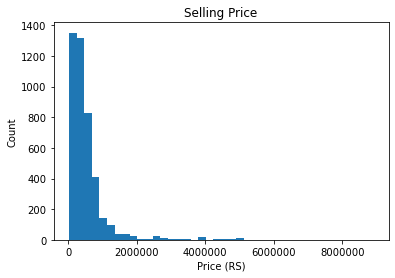

In [4]:
plt.hist(df.selling_price, bins=40)
plt.title('Selling Price')
plt.ylabel('Count')
plt.xlabel('Price (RS)')
plt.ticklabel_format(style='plain') #This disables the scientific notation on the y-axis, it used to be 1e6
plt.show()

Above, we can see that the data is very skewed right, this means that there may be some outliers which could skew our central location statistics. Here are the most commonly used central locators, note the differences between them and whether outliers could have caused them. 

In [5]:
print(f'Mean = {(np.round(df.selling_price.mean()))}')
print(f'Median = {df.selling_price.median()}')
mode = df.selling_price.mode()
print(f'Mode = {mode[0]}')
print(f'Trimmed mean = {np.round(stats.trim_mean(df.selling_price, 0.1))}')

Mean = 504127.0
Median = 350000.0
Mode = 300000
Trimmed mean = 401905.0


Above we can see that the mean is far higher than the median and mode, this could give an inaccurate central location of the data and be less robust due to the outliers. With data that is not normally distributed like this, the mean may not be the best indicator of where the data is primarily gathered, the median may be more accurate. You could also use a trimmed mean to get rid of the top and bottom 10% of data to try and remove the effect of outlier data. 

The Spread is another feature of univariate statistics that demonstrates how spread out the data is from the central value. If the data is clustered together, you can be more confident that any particular car will be closer to RS350,000 (the median value). The spread contains statistics such as range, interquartile range (IQR), variance, standard deviation and mean absolute deviation. 

In [6]:
print(f'range = {df.selling_price.max() - df.selling_price.min()}')
print(f'IQR = {np.percentile(df.selling_price,75) - np.percentile(df.selling_price,25)}')
print(f'Variance = {np.round(df.selling_price.var())}')
print(f'Standard Deviation = {np.round(df.selling_price.std())}')
print(f'Mean Absolute Deviation = {np.round(df.selling_price.mad())}')

range = 8880000
IQR = 391250.25
Variance = 334718640088.0
Standard Deviation = 578549.0
Mean Absolute Deviation = 324405.0


As the variance is the result of squared absolute values, it is on a different scale to the actual data and so is not very useful on its own, the standard deviation is the square root of the variance and so is used instead. With skewed data like this, it is better to use spread values like IQR and MAD as they are more robust and less susceptible to outliers. With normally distributed data the standard deviation and variance are more frequently reported. 

Categorical variables are variables that have names, such as 'Diesel' in fuel type or 'Individual' in seller type. These variables can be either nominal (no order) or ordinal (ordered). The gaps between categorical types may not always be even, therefore we should not use the mean or any locator that relies on the mean such as standard deviation or variance. Instead, the commonly used locator is that of frequency or proportion, using value_counts(). This can then be displayed in a bar chart. 

In [7]:
print(df.fuel.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [8]:
print(df.fuel.value_counts(normalize=True))

Diesel      0.496083
Petrol      0.489171
CNG         0.009217
LPG         0.005300
Electric    0.000230
Name: fuel, dtype: float64


Above we can see that diesel is the most common fuel type, with petrol close behind. The others are very far behind and could probably be amalgamated into a separate category of 'Other'.

In [9]:
print(len(df.fuel[df.fuel == 'Diesel']))

2153


In [10]:
df.fuel = df.fuel.apply(lambda x: 'Other' if len(df.fuel[df.fuel == x]) < 100 else x)
fuel = df.fuel.value_counts().reset_index()

In [11]:
fuel

,index,fuel
0,Diesel,2153
1,Petrol,2123
2,Other,64


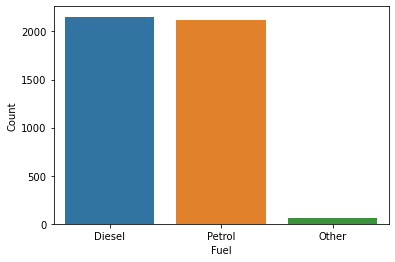

In [12]:
sns.barplot(data=fuel, x='index', y='fuel')
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.show()

Bivariate statistics are used to evaluate the relationship between 2 variables, for example: Do newer cars cost more money? Do manual transmission cars cost less than automatic? Do individual dealers sell more automatic cars? As you can see, these can be a mix of quantitative or categorical variables that we are comparing to each other. Depending on the types of summary statistics that we are comparing, we should use different methods. 

If we are deciding to investigate whether manual cars cost less than automatic cars, we can compare the medians or central locators of the two.

In [26]:
manuals_median = df.selling_price[df.transmission == 'Manual'].median()
auto_median = df.selling_price[df.transmission == 'Automatic'].median()
print(f'Manual Median = {manuals_median}')
print(f'Automatic Median = {auto_median}')

Manual Median = 325000.0
Automatic Median = 950000.0


Here we can see that there is a difference of 625,000 between the median price of a manual car and the median price of an automatic car. 

Investigating two quantitative variables like do older cars cost less money? (year and price), we can use Pearson's correlation to see if there is a positive or negative association between the variables. 

In [28]:
year_price = df[['selling_price', 'year']].corr(method='pearson')
year_price

,selling_price,year
selling_price,1.000000,0.413922
year,0.413922,1.000000


Here we can see that the correlation is 0.41 which is positive as Pearson's correlation goes from -1 to 1. This shows that as year increases, so does selling price. Therefore newer cars usually cost more than older cars and older cars usually cost less than newer cars.

If we're comparing two categorical vehicles such as transmission type and seller, we can use a contingency table and chi2 test.

In [31]:
cross = pd.crosstab(df.seller_type, df.transmission)
cross

transmission,Automatic,Manual
seller_type,,
Dealer,217,777
Individual,212,3032
Trustmark Dealer,19,83


In [34]:
print(chi2_contingency(cross))

(200.08368329113958, 3.567633340656093e-44, 2, array([[ 102.60645161,  891.39354839],
       [ 334.86451613, 2909.13548387],
       [  10.52903226,   91.47096774]]))


Here we can see the chi2 statistic, the p-value, the degrees of freedom and the expected values, in an array. The p-value is a very small number, far below 0.05. This shows that the results are statistically significant and there is a difference between types of vehicles sold by the type of seller that is not due to random chance. 

Overall, we can see how important it is to know what type of test or statistic you should be looking for before you start analysing the data. It can strongly affect how useful or accurate your results are. The main lesson to take from this is the difference between quantitative and categorical variables and how we should interact with them, as well as looking at the shape of the data to influence what type of test we use. 